# Lab 04

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2023-10-30 19:23:33.323213: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

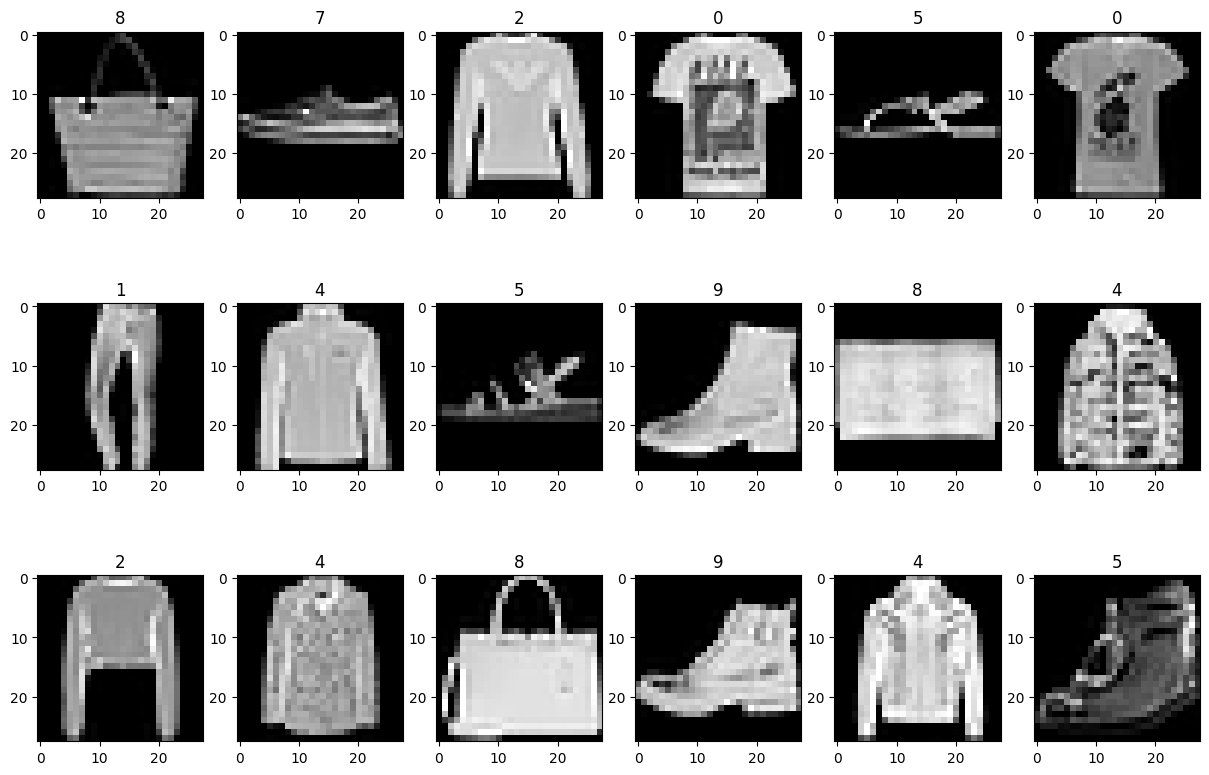

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt += 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train / 255
x_test = x_test / 255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 14s 14ms/step - loss: 0.4105 - accuracy: 0.8584 - val_loss: 0.3369 - val_accuracy: 0.8778
Epoch 2/50
938/938 [==============================] - 11s 12ms/step - loss: 0.2714 - accuracy: 0.9038 - val_loss: 0.3048 - val_accuracy: 0.8917
Epoch 3/50
938/938 [==============================] - 12s 12ms/step - loss: 0.2316 - accuracy: 0.9156 - val_loss: 0.3026 - val_accuracy: 0.8924
Epoch 4/50
938/938 [==============================] - 12s 12ms/step - loss: 0.1993 - accuracy: 0.9273 - val_loss: 0.3047 - val_accuracy: 0.8950
Epoch 5/50
938/938 [==============================] - 11s 12ms/step - loss: 0.1775 - accuracy: 0.9351 - val_loss: 0.3152 - val_accuracy: 0.8965
Epoch 6/50
938/938 [==============================] - 12s 12ms/step - loss: 0.1607 - accuracy: 0.9415 - val_loss: 0.3121 - val_accuracy: 0.8981
Epoch 7/50
938/938 [==============================] - 12s 12ms/step - loss: 0.1441 - accuracy: 0.9462 - val_loss: 0.3324 - val_accuracy:

Train Acc      0.9939166903495789
Validation Acc 0.8770999908447266


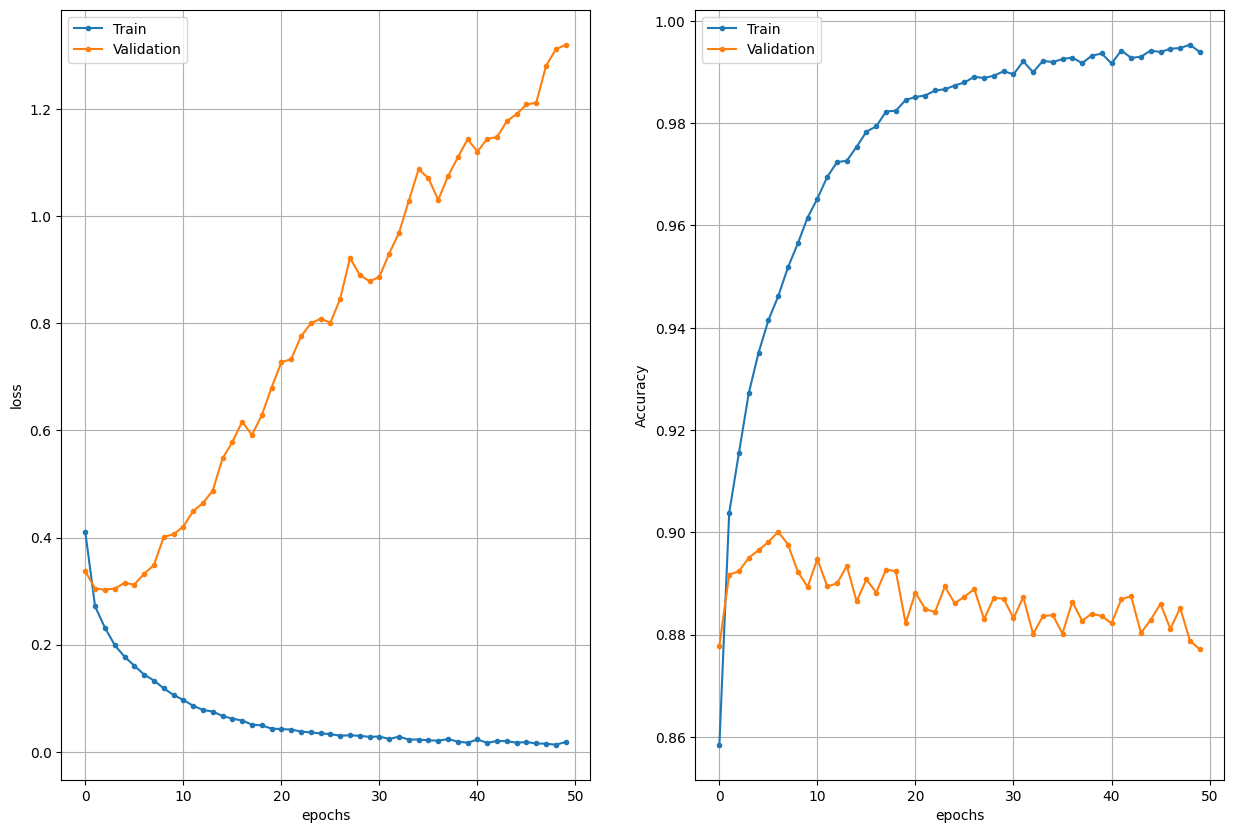

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0   

In [36]:
# Train the network
epochs = 50
batch_size = 64

early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, epochs=epochs, 
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/50
938/938 [==============================] - 14s 14ms/step - loss: 0.2234 - accuracy: 0.9178 - val_loss: 0.3108 - val_accuracy: 0.8958
Epoch 2/50
938/938 [==============================] - 14s 14ms/step - loss: 0.2117 - accuracy: 0.9221 - val_loss: 0.3064 - val_accuracy: 0.9006
Epoch 3/50
938/938 [==============================] - 13s 14ms/step - loss: 0.2060 - accuracy: 0.9236 - val_loss: 0.3033 - val_accuracy: 0.9063
Epoch 4/50
938/938 [==============================] - 14s 14ms/step - loss: 0.1962 - accuracy: 0.9275 - val_loss: 0.3143 - val_accuracy: 0.8987
Epoch 5/50
938/938 [==============================] - 13s 14ms/step - loss: 0.1935 - accuracy: 0.9285 - val_loss: 0.3261 - val_accuracy: 0.8953
Epoch 6/50
938/938 [==============================] - 13s 14ms/step - loss: 0.1849 - accuracy: 0.9314 - val_loss: 0.2965 - val_accuracy: 0.9061
Epoch 7/50
938/938 [==============================] - 13s 14ms/step - loss: 0.1836 - accuracy: 0.9316 - val_loss: 0.3036 - val_accuracy:

Train Acc      0.932533323764801
Validation Acc 0.906000018119812


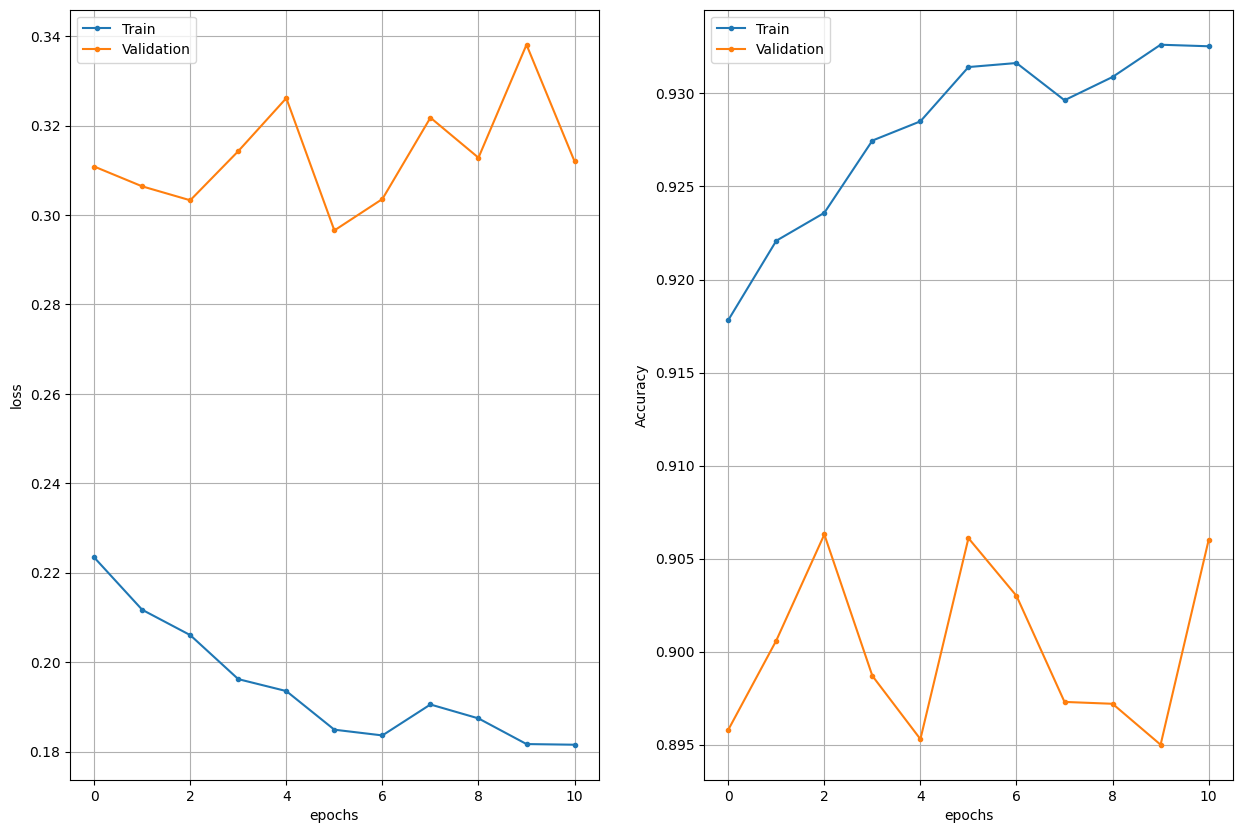

In [37]:
# Show the results
plot_history(history)

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

In [ ]:
model.